In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("macrodata.csv", index_col=0, parse_dates=True)
df.head(2)

,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
year,,,,,,,,,,,,,
1959-01-01,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-01-01,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74


<Axes: xlabel='year'>

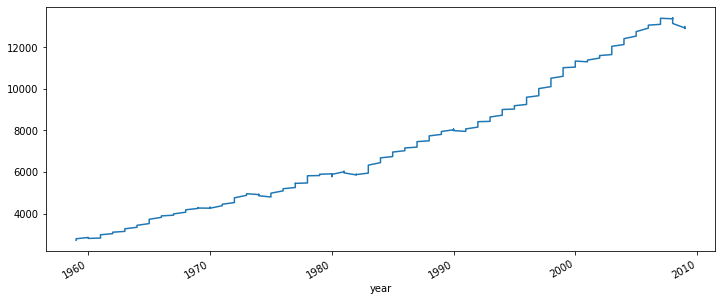

In [4]:
df["realgdp"].plot(figsize=(12,5))

## Statsmodels - Hodrick Prescott Filter

In [5]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [6]:
"""The Hodrick-Prescott smoothing parameter. A value of 1600 is
suggested for quarterly data. Ravn and Uhlig suggest using a value
of 6.25 (1600/4**4) for annual data and 129600 (1600*3**4) for monthly data."""

gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

In [7]:
type(gdp_trend)

pandas.core.series.Series

In [8]:
df['trend'] = gdp_trend

In [9]:
df.head()

,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend
year,,,,,,,,,,,,,,
1959-01-01,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-01-01,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-01-01,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-01-01,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-01-01,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333


<Axes: xlabel='year'>

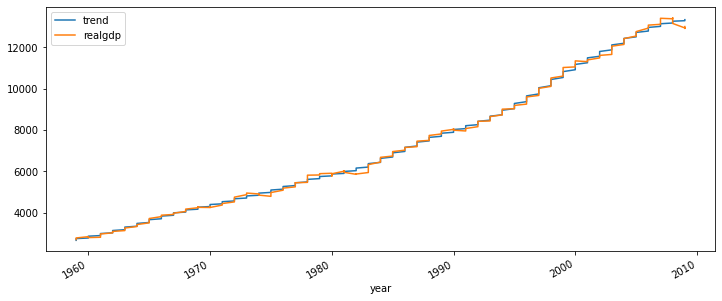

In [11]:
df[['trend', 'realgdp']].plot(figsize=(12,5))

<Axes: xlabel='year'>

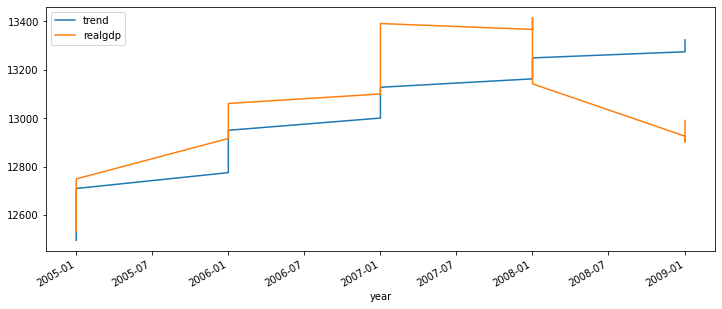

In [13]:
df[['trend', 'realgdp']]['2005-01-01':].plot(figsize=(12,5))